# Compare TCW rasters with alternate method from CEWO


**What does this notebook do?**

**Required inputs**
* geotiffs of thresholded TCW extents
* geotiff of "off-river storages" identifed by cewo
* geotiff of cewo-identified extents

**Date** July 2018

**Authors** Claire Krause, Bex Dunn

In [ ]:
### trying to remove areas from a shapefile

In [1]:
%pylab notebook
import xarray as xr
import matplotlib.pyplot as plt
from datacube.storage import masking

Populating the interactive namespace from numpy and matplotlib


## Choose tiff files for input and load in using rasterio

offriverfile contains the storages that cewo removes from the prediction; we're removing it from ours as well

In [2]:
#offriverFile = '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/off_river_storages.tif'

thresholds are our chosen thresholds for the TCW; these need to match the filenames, and are not set here.

In [3]:
thresholds = ['-0','-100','-200','-300','-400','-500','-600']

In [4]:
#make a list of the files corresponding to our set thresholds
thresholdFiles =[]
for i in range(0, len(thresholds)):
    thresholdFiles.append('/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t{0}_Mac_14_-35_20160627__20160629_clipped.tif'.format(thresholds[i]))

In [5]:
thresholdFiles

['/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-0_Mac_14_-35_20160627__20160629_clipped.tif',
 '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-100_Mac_14_-35_20160627__20160629_clipped.tif',
 '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-200_Mac_14_-35_20160627__20160629_clipped.tif',
 '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-300_Mac_14_-35_20160627__20160629_clipped.tif',
 '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-400_Mac_14_-35_20160627__20160629_clipped.tif',
 '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-500_Mac_14_-35_20160627__20160629_clipped.tif',
 '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-600_Mac_14_-35_20160627__20160629_clipped.tif']

cewo file is the file with cewo's scene of the extent of inundation

In [6]:
thresholdFiles[0]

'/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/t-0_Mac_14_-35_20160627__20160629_clipped.tif'

In [20]:
cewoFile = '/g/data/r78/rjd547/Macquarie_Marsh/bexnessresults/thresholded_wetness/clipped/no_storages/cewo_20160628_tileandclip.tif'

## Load in the threshold, off-river storage and extent geotiffs

In [21]:
# Open the GeoTIFFs using rasterio
cewoData = xr.open_rasterio(cewoFile) #extents file
ThresholdData = xr.open_rasterio(thresholdFiles[0]) #thresholded TCW
#offriverData = xr.open_rasterio(offriverFile) #offriverstorages only

<IPython.core.display.Javascript object>


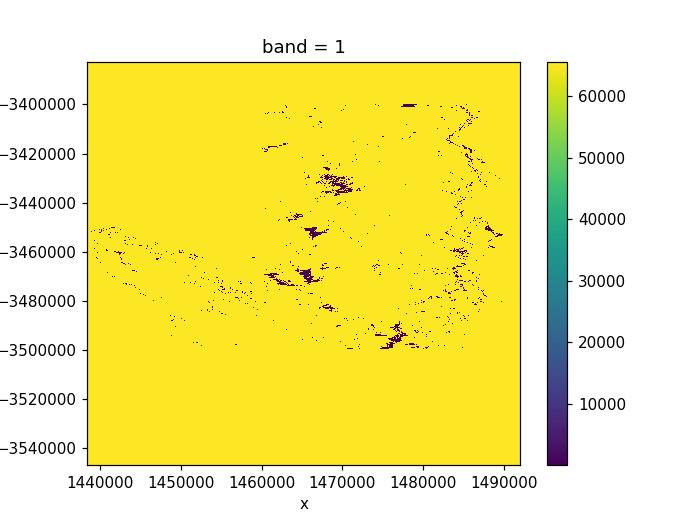

In [22]:
plt.clf()
cewoData.plot()
plt.show()

In [23]:
cewoData

<xarray.DataArray (band: 1, y: 6564, x: 2144)>
[14073216 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -3.383e+06 -3.383e+06 -3.383e+06 -3.383e+06 ...
  * x        (x) float64 1.438e+06 1.438e+06 1.438e+06 1.439e+06 1.439e+06 ...
Attributes:
    transform:   (25.0, 0.0, 1438421.001, 0.0, -25.0, -3382788.875, 0.0, 0.0,...
    crs:         +init=epsg:3577
    res:         (25.0, 25.0)
    is_tiled:    0
    nodatavals:  (65535.0,)

In [25]:
ThresholdData

<xarray.DataArray (band: 1, y: 6564, x: 2144)>
[14073216 values with dtype=float32]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 -3.383e+06 -3.383e+06 -3.383e+06 -3.383e+06 ...
  * x        (x) float64 1.438e+06 1.438e+06 1.438e+06 1.439e+06 1.439e+06 ...
Attributes:
    transform:   (25.0, 0.0, 1438421.0013571545, 0.0, -25.0, -3382788.8746242...
    crs:         +init=epsg:3577
    res:         (25.0, 25.0)
    is_tiled:    0
    nodatavals:  (-3.4028234663852886e+38,)

In [14]:
#filter out both sets of nodata values as defined by CEWO
#cewoData = cewoData.where(cewoData!=-3.4028234663852886e+38) #remove no data vals
#cewoData = cewoData.where(cewoData!=0) #remove no data vals
#cewoData = cewoData.where(cewoData!=65535.) #remove no data vals

In [ ]:
ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
ThresholdData=ThresholdData.where(ThresholdData!=0)
#take off river storages out of the thresholded data
ThresholdData=ThresholdData.where(cewoData!=2.0)

In [ ]:
offriverstorages=cewoData.where(cewoData==2.0)
cewoData = cewoData.where(cewoData!=2.) #remove off river storages

In [ ]:
ThresholdData

In [ ]:
plt.clf()
offriverstorages.plot()
plt.show()

In [ ]:
#ThresholdData=ThresholdData.where(offriverstorages!=2.0)

In [ ]:
ThresholdData.min()

In [ ]:
ThresholdData=ThresholdData.where(ThresholdData!=-3.4028234663852886e+38)
ThresholdData=ThresholdData.where(ThresholdData!=0)
#ThresholdData=ThresholdData.where(cewoData.data!=2.0)

In [ ]:
plt.clf()
ThresholdData.plot()
plt.show()

In [ ]:
#cewoData=cewoData.where(cewoData!=65535.0)

In [ ]:
#cewoData

In [ ]:
# cewoData.plot()
# plt.show()

Trying our first batch of comparisons here:

In [ ]:
ThresholdData.where(ThresholdData==1).count()

In [ ]:
cewoData.where(cewoData==1).count()

In [ ]:
# Make sure all the missing values are taken out
NDVIDatamaxNonull = NDVIDatamax.where(NDVIDatamax != -1)
NDMIDatamaxNonull = NDMIDatamax.where(NDMIDatamax != -1)

## Read in the validation mask and use it to examine the resulting pixel populations

In [ ]:
# Data * mask = data or nan
NDVIIrrigated = mask * NDVIDatamaxNonull
# Find where the mask is nan, and use this True/False to mask data
NDVINonIrrigated = NDVIDatamaxNonull.where(np.isnan(mask))

# Data * mask = data or nan
NDMIIrrigated = mask * NDMIDatamaxNonull
# Find where the mask is nan, and use this True/False to mask data
NDMINonIrrigated = NDMIDatamaxNonull.where(np.isnan(mask))

## Need to flatten the data so we can plot two single dimension arrays against each other

In [ ]:
NDVIIrrigatedflat = NDVIIrrigated.data.reshape(NDVIIrrigated.x.size * NDVIIrrigated.y.size)
NDVINonIrrigatedflat = NDVINonIrrigated.data.reshape(NDVINonIrrigated.x.size * NDVINonIrrigated.y.size)

NDMIIrrigatedflat = NDMIIrrigated.data.reshape(NDMIIrrigated.x.size * NDMIIrrigated.y.size)
NDMINonIrrigatedflat = NDMINonIrrigated.data.reshape(NDMINonIrrigated.x.size * NDMINonIrrigated.y.size)

## Draw a histogram of the two populations

Matplotlib histogram doesn't like `nan`, so we need to remove the `nan` values before we can create a histogram. This is done by reshaping the array into a single dimension, then removing the nan values.

This histogram will allow us to determine a valid threshold value for the automatic irrigated crop extent layer.

In [ ]:
bin_values = np.arange(0, 1.0, 0.02)

fig, axs = plt.subplots(1, 2, sharex=True, tight_layout=True, figsize = [9,5])
axs[0].hist(NDVIIrrigatedflat[np.isfinite(NDVIIrrigatedflat)], bins=bin_values, facecolor = 'blue');
axs[0].set_title('{0} for Namoi irrigated fields {0}'.format(Index, year))
axs[0].set_xlabel(Index)
axs[1].hist(NDVINonIrrigatedflat[np.isfinite(NDVINonIrrigatedflat)], bins=bin_values, facecolor = 'brown');
axs[1].set_title('{0} for Namoi non-irrigated fields {0}'.format(Index, year))
axs[1].set_xlabel(Index)
savefig('/g/data/r78/cek156/dea-notebooks/Crop_mapping/Playing_around/Namoi_NDVI_{1}.jpg'.format(Index, year))

## Is there a relationship between a pixel's NDVI and NDMI?

In [ ]:
plt.figure(figsize = [8,8])

plt.scatter(NDVINonIrrigatedflat[::10], NDMINonIrrigatedflat[::10], facecolor = 'brown', marker = '.')
plt.scatter(NDVIIrrigatedflat[::10], NDMIIrrigatedflat[::10], facecolor = 'blue', marker = '.')
plt.xlabel('NDVI')
plt.ylabel('NDMI')
plt.title('NDVI vs NDMI for every pixel in the Namoi Catchment')
plt.legend(['Non-irrigated pixels', 'Irrigated pixels'])
savefig('/g/data/r78/cek156/dea-notebooks/Crop_mapping/Playing_around/Namoi_scatter_{0}.jpg'.format(year))